In [28]:
import calendar

In [50]:
df = pd.read_csv('Modified_sales_data.csv')
df=df.drop(['City'],axis=1)
df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Hour
0,0,295665,Frankincense,17,1700.00,2019-12-30 00:01:00,USA,12,1700.00,0
1,1,295666,Myrrh,6,600.00,2019-12-29 07:03:00,UK,12,600.00,7
2,2,295667,Haggar,0,11.95,2019-12-12 18:21:00,Turkey,12,11.95,18
3,3,295668,Haggar,1,149.99,2019-12-22 15:13:00,UK,12,149.99,15
4,4,295669,Frankincense,0,11.95,2019-12-18 12:38:00,UK,12,11.95,12


In [51]:
#Total sales
print('The total revenue is KES {}'.format(df['Sales'].sum()*100))

The total revenue is KES 3449203597.0


In [52]:
#Sales per product per month 
sales_per_prod_month = df.groupby(['Month', 'Product'])['Sales'].sum().reset_index()

sales_per_prod_month
# Map numeric months to month names
df['Month'] = df['Month'].apply(lambda x: calendar.month_name[int(x)])

# Group by 'Month' and sum the 'Sales'
sales_per_month = df.groupby('Month', sort=False)['Sales'].sum().reset_index()


# Print the result
print(sales_per_month)



        Month       Sales
0    December  4613443.34
1     January  1822256.73
2       April  3390670.24
3         May  3152606.75
4    February  2202022.42
5       March  2807100.38
6      August  2244467.88
7   September  2097560.13
8        June  2577802.26
9    November  3199603.20
10    October  3736726.88
11       July  2647775.76


In [53]:
sales_per_prod_month

,Month,Product,Sales
0,1,Frankincense,610443.61
1,1,Haggar,628146.14
2,1,Myrrh,583666.98
3,2,Frankincense,736847.95
4,2,Haggar,688307.37
5,2,Myrrh,776867.10
6,3,Frankincense,914483.26
7,3,Haggar,934813.72
8,3,Myrrh,957803.40
9,4,Frankincense,1150049.73


In [54]:
sales_per_month = df.groupby('Month')['Sales'].sum().reset_index()

# Rename columns for clarity
sales_per_month.columns = ['Month', 'Total Sales']
sales_per_month



,Month,Total Sales
0,April,3390670.24
1,August,2244467.88
2,December,4613443.34
3,February,2202022.42
4,January,1822256.73
5,July,2647775.76
6,June,2577802.26
7,March,2807100.38
8,May,3152606.75
9,November,3199603.20


In [55]:
#Total sales per country including visual
total_sales_country=df.groupby('Purchase Address')['Sales'].sum().reset_index()
total_sales_country=df[['Purchase Address','Sales','Month']]
total_sales_country

,Purchase Address,Sales,Month
0,USA,1700.00,December
1,UK,600.00,December
2,Turkey,11.95,December
3,UK,149.99,December
4,UK,11.95,December
...,...,...,...
185945,Turkey,2.99,June
185946,Tanzania,149.99,June
185947,Tanzania,11.95,June
185948,Turkey,11.95,June


In [56]:
# Total Sales by Product and Country
sales_by_product_country = df.groupby(["Product", "Purchase Address"])["Sales"].sum().reset_index()

# Quantity Ordered by Product
quantity_by_product = df.groupby("Product")["Quantity Ordered"].sum().reset_index()

# Average Sales per Order by Product and Country
avg_sales_by_product_country = df.groupby(["Product", "Purchase Address"])["Sales"].mean().reset_index()
# Peak Hours of Sales
peak_hours = df.groupby("Hour")["Sales"].sum().reset_index().sort_values(by="Sales", ascending=False)

# Display results
print("Total Sales by Product and Country:\n", sales_by_product_country)
print("\nQuantity Ordered by Product:\n", quantity_by_product)
print("\nAverage Sales per Order by Product and Country:\n", avg_sales_by_product_country)
print("\nPeak Hours of Sales:\n", peak_hours.head())

Total Sales by Product and Country:
          Product Purchase Address       Sales
0   Frankincense             Iraq  1427674.88
1   Frankincense            Korea  1424835.93
2   Frankincense      Netherlands  1450977.54
3   Frankincense         Tanzania  1473284.24
4   Frankincense           Turkey  1428418.67
5   Frankincense               UK  1393807.29
6   Frankincense              USA  1438502.78
7   Frankincense           Uganda  1449626.65
8         Haggar             Iraq  1391636.22
9         Haggar            Korea  1388070.77
10        Haggar      Netherlands  1374649.68
11        Haggar         Tanzania  1423646.83
12        Haggar           Turkey  1488652.97
13        Haggar               UK  1395196.42
14        Haggar              USA  1480623.04
15        Haggar           Uganda  1481188.52
16         Myrrh             Iraq  1380366.19
17         Myrrh            Korea  1470029.99
18         Myrrh      Netherlands  1452622.26
19         Myrrh         Tanzania  1448203.

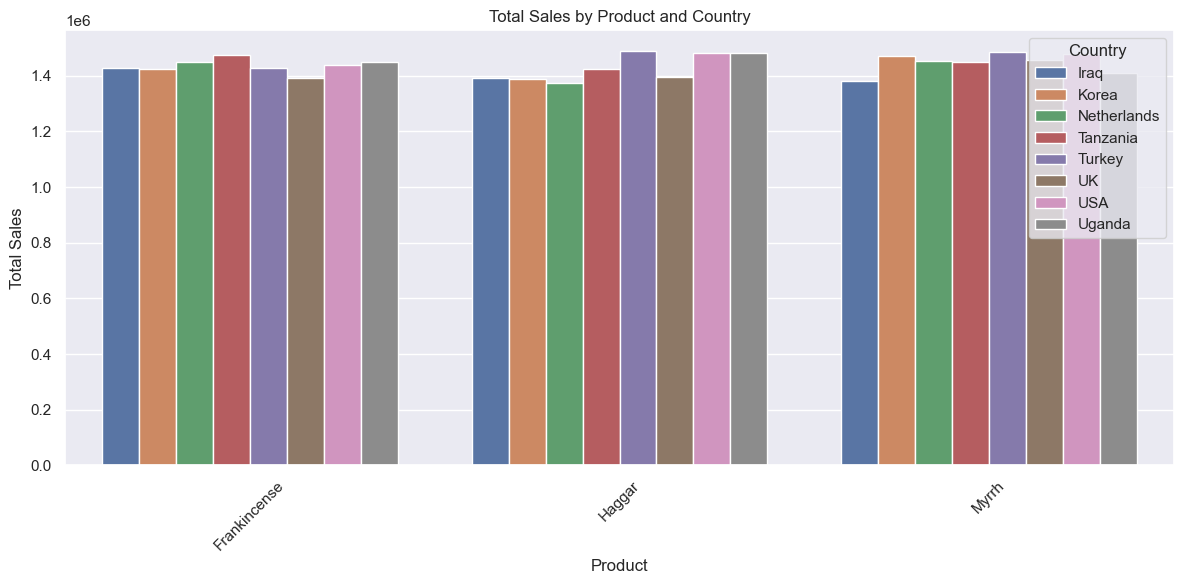

C:\Users\victor.bett\AppData\Local\Temp\ipykernel_18824\3647275397.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


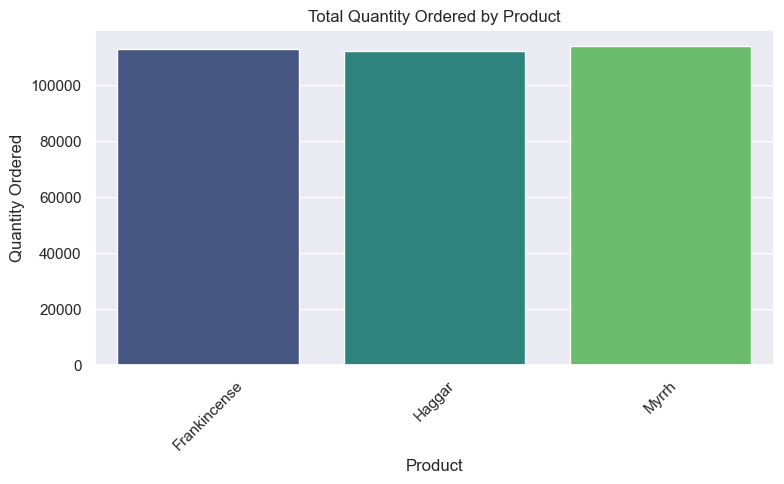

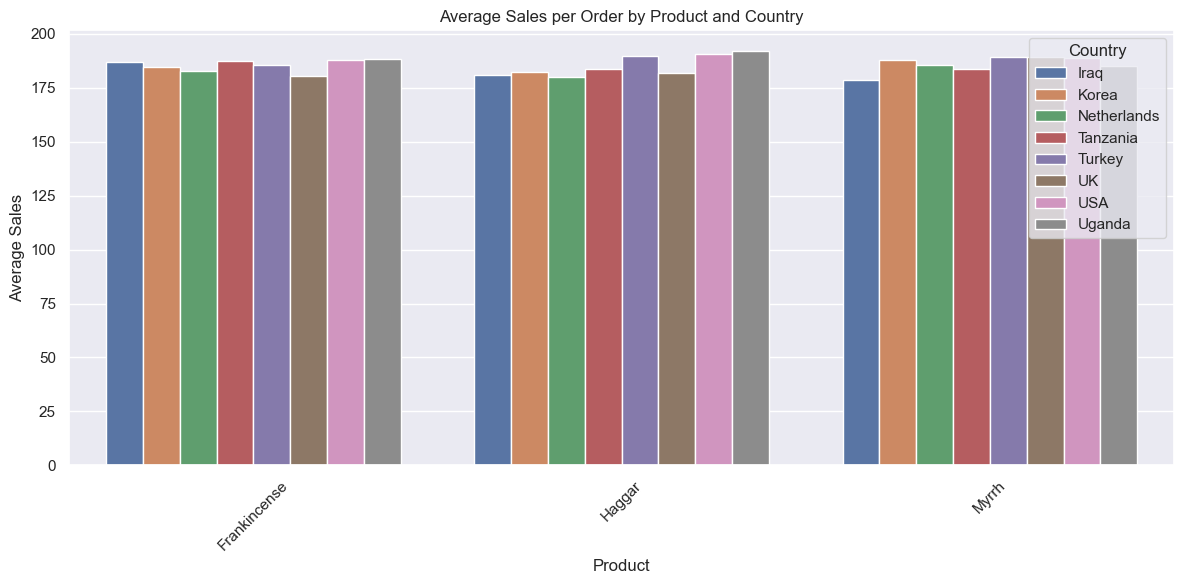

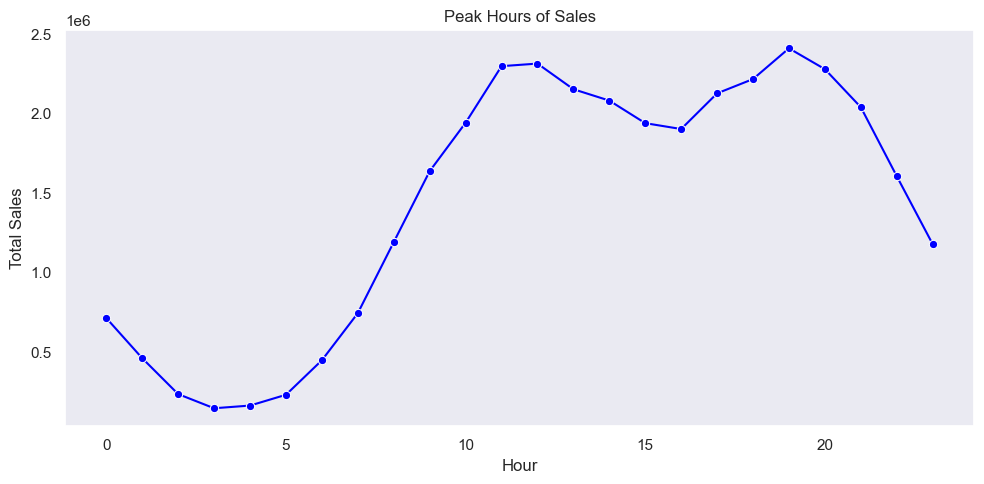

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Total Sales by Product and Country
sales_by_product_country = df.groupby(["Product", "Purchase Address"])["Sales"].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(
    data=sales_by_product_country, 
    x="Product", 
    y="Sales", 
    hue="Purchase Address"
)
plt.title("Total Sales by Product and Country")
plt.xlabel("Product")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.legend(title="Country")
plt.tight_layout()
plt.show()

# Quantity Ordered by Product
quantity_by_product = df.groupby("Product")["Quantity Ordered"].sum().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(
    data=quantity_by_product, 
    x="Product", 
    y="Quantity Ordered", 
    palette="viridis"
)
plt.title("Total Quantity Ordered by Product")
plt.xlabel("Product")
plt.ylabel("Quantity Ordered")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Average Sales per Order by Product and Country
avg_sales_by_product_country = df.groupby(["Product", "Purchase Address"])["Sales"].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(
    data=avg_sales_by_product_country, 
    x="Product", 
    y="Sales", 
    hue="Purchase Address"
)
plt.title("Average Sales per Order by Product and Country")
plt.xlabel("Product")
plt.ylabel("Average Sales")
plt.xticks(rotation=45)
plt.legend(title="Country")
plt.tight_layout()
plt.show()

# Peak Hours of Sales
peak_hours = df.groupby("Hour")["Sales"].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=peak_hours, x="Hour", y="Sales", marker="o", color="blue")
plt.title("Peak Hours of Sales")
plt.xlabel("Hour")
plt.ylabel("Total Sales")
plt.grid()
plt.tight_layout()
plt.show()


C:\Users\victor.bett\AppData\Local\Temp\ipykernel_18824\1580381242.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


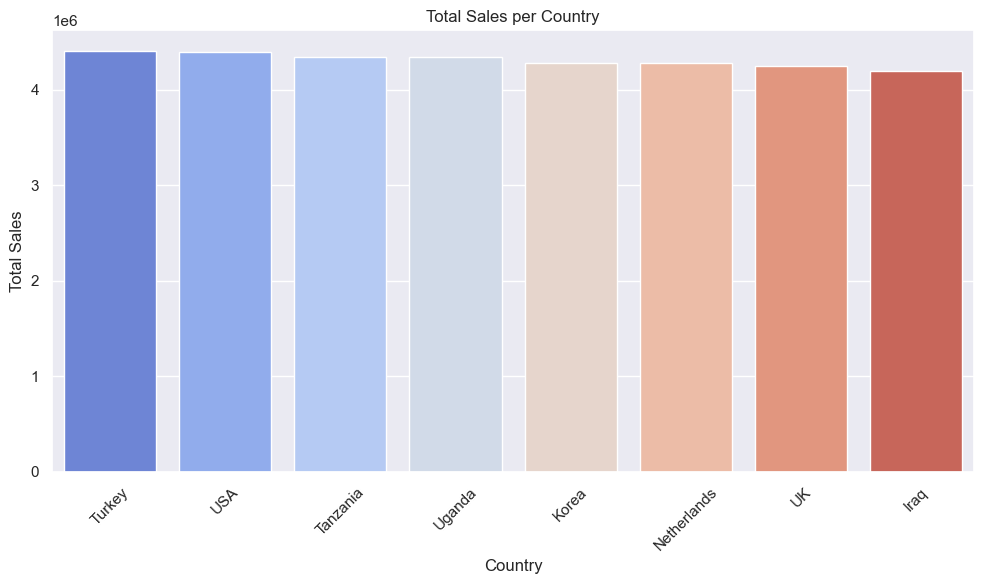

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate total sales per country
sales_per_country = df.groupby("Purchase Address")["Sales"].sum().reset_index()
sales_per_country = sales_per_country.sort_values(by="Sales", ascending=False)

# Visualization: Sales per Country
plt.figure(figsize=(10, 6))
sns.barplot(
    data=sales_per_country, 
    x="Purchase Address", 
    y="Sales", 
    palette="coolwarm"
)
plt.title("Total Sales per Country")
plt.xlabel("Country")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [60]:
# Calculate total sales per country
sales_per_country = df.groupby("Purchase Address")["Sales"].sum().reset_index()
sales_per_country
sales_per_country = sales_per_country.sort_values(by="Sales", ascending=False)
sales_per_country

,Purchase Address,Sales
4,Turkey,4401084.88
6,USA,4396040.88
3,Tanzania,4345134.11
7,Uganda,4342240.83
1,Korea,4282936.69
2,Netherlands,4278249.48
5,UK,4246671.81
0,Iraq,4199677.29


C:\Users\victor.bett\AppData\Local\Temp\ipykernel_18824\1580381242.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


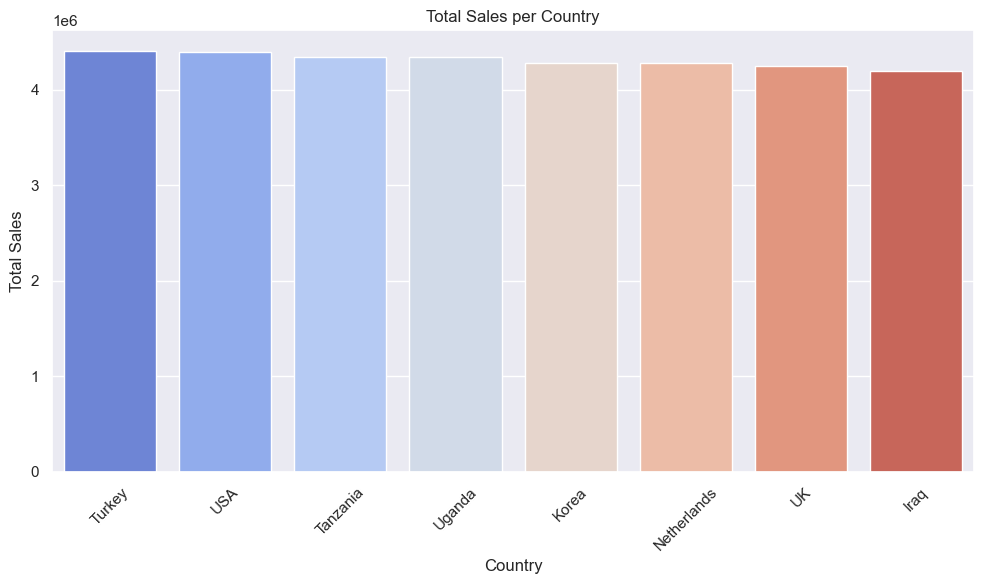

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate total sales per country
sales_per_country = df.groupby("Purchase Address")["Sales"].sum().reset_index()
sales_per_country = sales_per_country.sort_values(by="Sales", ascending=False)

# Visualization: Sales per Country
plt.figure(figsize=(10, 6))
sns.barplot(
    data=sales_per_country, 
    x="Purchase Address", 
    y="Sales", 
    palette="coolwarm"
)
plt.title("Total Sales per Country")
plt.xlabel("Country")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [62]:


# Calculate total sales per country
sales_per_country = df.groupby("Purchase Address")["Sales"].sum().reset_index()
sales_per_country
sales_per_country = sales_per_country.sort_values(by="Sales", ascending=False)
sales_per_country




,Purchase Address,Sales
4,Turkey,4401084.88
6,USA,4396040.88
3,Tanzania,4345134.11
7,Uganda,4342240.83
1,Korea,4282936.69
2,Netherlands,4278249.48
5,UK,4246671.81
0,Iraq,4199677.29
